In [2]:
import tensorflow as tf
from prosit_t.losses import masked_spectral_distance, masked_pearson_correlation_distance
import wandb
from wandb.keras import WandbCallback
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2023-06-16 07:57:36.060011: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 07:57:36.173896: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-16 07:57:36.856700: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-16 07:57:36.856767: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [3]:
project_name = "transforming-prosit"
run = wandb.init(project=project_name)

wandb: Currently logged in as: mamisashvili-lizi. Use `wandb login --relogin` to force relogin


In [4]:
from prosit_t.data import IntensityDataset

TRAIN_DATAPATH = 'https://raw.githubusercontent.com/wilhelm-lab/dlomix-resources/main/example_datasets/Intensity/proteomeTools_train_val.csv'
BATCH_SIZE = 64
int_data = IntensityDataset(data_source=TRAIN_DATAPATH, seq_length=30,
                            collision_energy_col='collision_energy', batch_size=BATCH_SIZE, val_ratio=0.2, test=False)

2023-06-16 07:57:49.771608: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 07:57:50.850505: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43648 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:21:00.0, compute capability: 8.6
2023-06-16 07:57:50.851070: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 43648 MB memory:  -> device: 1, name: NVIDIA A40, pci bus id: 0000:81:00.0, compute capability: 8.6
2023-06-16 07:57:50.851428: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 43648 MB

In [5]:
test_batch = int_data.val_data.take(1)

In [6]:
artifact_paths = [
    "mamisashvili-lizi/transforming-prosit/model-64_heads_2_encoders_pos_emb_size_512:v78",
    "mamisashvili-lizi/transforming-prosit/model-16_heads_2_encoders_pos_emb_size_64:v75",
    "mamisashvili-lizi/transforming-prosit/model-16_heads_2_encoders_pos_emb_size_64_low_dropout:v19"
]

In [7]:
models_dict = {}

In [8]:
for i, path in enumerate(artifact_paths):
    artifact = run.use_artifact(path)
    model_dir = artifact.download()
    model = tf.keras.models.load_model(model_dir, custom_objects={
        "masked_spectral_distance": masked_spectral_distance,
        "masked_pearson_correlation_distance": masked_pearson_correlation_distance
    })
    if i == 0:
        models_dict["models"] = [model]
    else:
        models_dict["models"].append(model)

wandb: Downloading large artifact model-64_heads_2_encoders_pos_emb_size_512:v78, 108.80MB. 4 files... 
wandb:   4 of 4 files downloaded.  
Done. 0:0:0.2
wandb:   4 of 4 files downloaded.  
wandb:   4 of 4 files downloaded.  


In [9]:
for i, model in enumerate(models_dict["models"]):
    if i == 0:
        models_dict["weights"] = [model.get_weights()]
    else:
        models_dict["weights"].append(model.get_weights())

In [10]:
for i, model in enumerate(models_dict["models"]):
    if i == 0:
        models_dict["layers"] = [model.layers]
    else:
        models_dict["layers"].append(model.layers)

<Axes: >

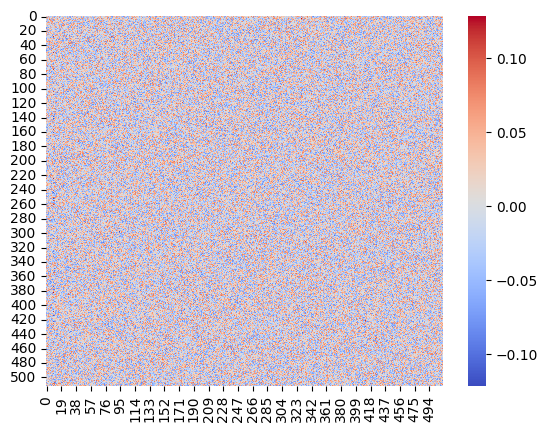

In [12]:
sns.heatmap(models_dict["layers"][0][5].weights[12], cmap='coolwarm')

<Axes: >

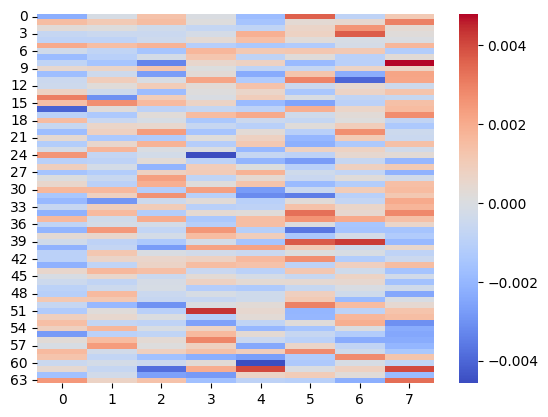

In [14]:
sns.heatmap(models_dict["layers"][0][5].weights[17], cmap='coolwarm')

<Axes: >

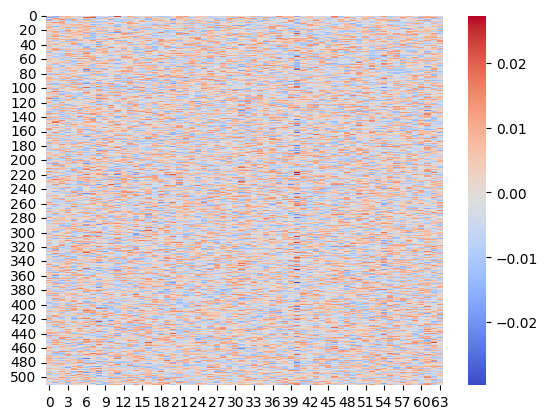

In [15]:
sns.heatmap(models_dict["layers"][0][5].weights[18][:,:,0], cmap='coolwarm')

<Axes: >

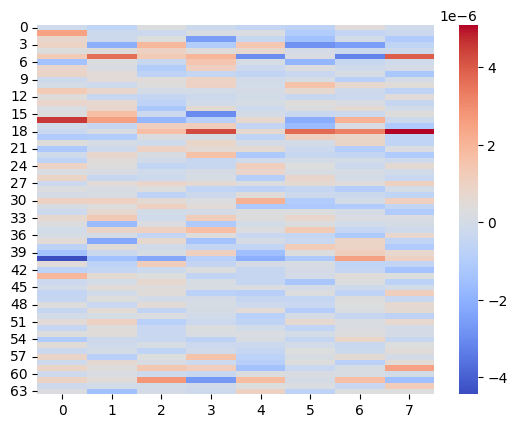

In [16]:
sns.heatmap(models_dict["layers"][0][5].weights[19], cmap='coolwarm')

<Axes: >

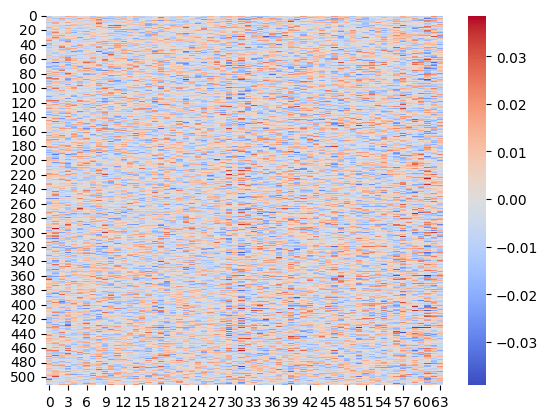

In [17]:
sns.heatmap(models_dict["layers"][0][5].weights[20][:,:,0], cmap='coolwarm')

<Axes: >

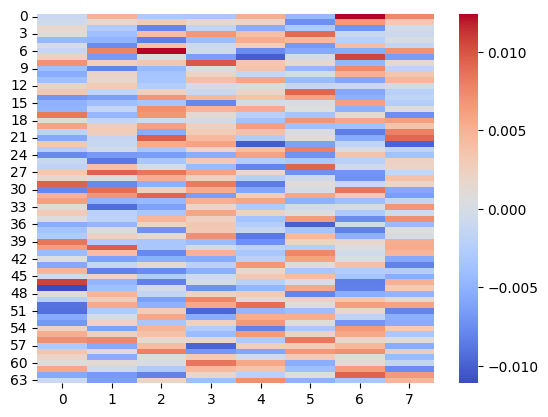

In [18]:
sns.heatmap(models_dict["layers"][0][5].weights[21], cmap='coolwarm')

<Axes: >

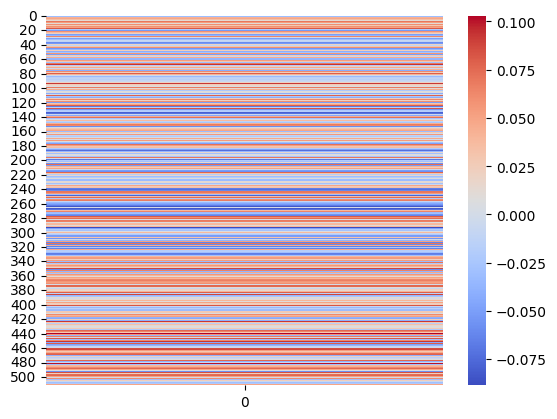

In [28]:
sns.heatmap(models_dict["layers"][0][3].weights[0].numpy().reshape(-1,1), cmap='coolwarm')

<Axes: >

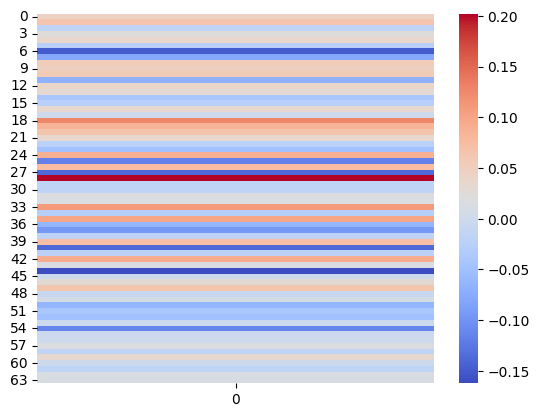

In [11]:
sns.heatmap(models_dict["layers"][-1][3].weights[0].numpy().reshape(-1,1), cmap='coolwarm')